(chap:distribution)=
# 所得分布と所得収斂

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [3]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py4macro
import statsmodels.formula.api as smf

# numpy v1の表示を使用
np.set_printoptions(legacy='1.21')
# 警告メッセージを非表示
import warnings
warnings.filterwarnings("ignore")

## はじめに

[発展会計](chap:5a-accounting)と[成長会計](chap:5b-accounting)の章では次の２つの問題を考察した。

> （問１）なぜある国は豊かで他の国は貧しいのだろうか？
>
> （問２）なぜ国々の経済成長率は大きく異なるのか？

ここでは関連する次の問を考える。

> （問３）貧しい国は豊かな国に追いついているのだろうか？

この問いを考察するために２つのアプローチを使う。第一に，一人当たりGDPを使い世界経済の所得分布がどのように変化したかを図示し検討する。所得分布の形状の変化からキャッチアップ（catch-up）が発生しているかを推論しようということである。第二に，回帰分析の手法を使い所得が低い経済は先進国に追いついているかを検討する。即ち，所得収斂が起こっているかを定量的に探ってみようということである。

本題に入る前に，所得収斂の経済学的メカニズムを簡単に紹介する。

**＜資本の限界生産性の逓減＞**<br>
資本の限界生産性（MPK）とは，資本を１単位増やした場合にどれだけ産出が増加するかを示しており，完全競争の下では実質利子率と等しくなる。従って，MPKは資本投資の収益率と考えることができる。しかし資本が増加するとMPKは逓減し資本投資のリターンが減少する事になる。ソロー・モデルでは，このメカニズムにより経済は定常状態へ収束することになり，その過程で成長率が減少する事になる。即ち，資本が少ない経済（貧しい経済）の成長率は高く，資本が多い国（豊かな経済）は成長率が低くなり，所得収斂が発生すると考えられる。

**＜技術伝播＞**<br>
技術進歩には様々な形がある。(i)同じ財をより効率的に生産する技術，(ii)既存の財・サービスをより質が高いものへ進化させる技術，(iii)今まで存在しなかった新たな財・サービスの出現。(i)~(iii)が中間財の技術進歩であれば，その技術を採用した企業の生産性は上昇する。労働者の移動や様々なネットワークを通じて，それらは他の企業・産業に伝播し経済全体の生産性が向上することになる。技術には特許などの知的財産権に守られるものもあるが，特許権には20年間という時間的制限がある。また知的財産権で守られたとしても，そこからヒントを得た似た技術が広がることも頻繁に発生している。(ii)と(iii)が最終財であれば，消費財の伝播として広がるり効用の増加につながる。重要な点は，このような技術伝播は国内に限らず，国境をまたいで発生することである。国際貿易や人的交流，経済支援などの形で徐々に技術は広がり，新技術を採用する経済の所得は上昇することになる。また後進国にとって有利な点は，新たな技術開発費用よりも既存の技術採用費用の方が断然低いということである。一旦，新しい技術・知識が創出されると，伝播に時間は掛かるが，世界中で利用されるようになり所得収斂につながる。特に，「伝統的な財」と異なり，デジタル技術の輸送費用は低く伝播し易いと考えられる。

**＜制度の伝播＞**<br>
「大富豪」や「ページワン」などのトランプ・ゲームを考えよう。ルールに従ってプレーヤーはゲームを楽しむが，ルールが少しでも変わると勝つことを目的とするプレーヤーは戦略を変えることになる。即ち，ルールが変わると行動が変わるのである。法や習慣などの社会的ルールを所与として最適な行動を選択する消費者や企業の行動も同じである。法が変わり，既存の方法ではビジネスが成り立たたない場合，新たな方法で利潤を得ようとするだろう。ここでの社会的ルールとは政策を含む政治経済**制度**であり，制度が消費者と企業のインセンティブに影響を与えるのである。民主主義の日本と独裁国家では消費者・企業の行動は異なることになる。また所得水準が高くなる（過去の成長率が高かった）制度もあれば，富が少数に集中する搾取的な制度により所得が低いままの（過去の成長率が低かった）経済もある。ここで重要な点は，高所得を発生させる政策や制度が，それらを採用していない経済に伝播するということである。典型的な例がソビエト連邦と東側ヨーロッパ社会主義圏の崩壊である。計画に基づく経済活動は成長の鈍化・停滞を招き，最終的には市場という制度の「伝播」が起こったと解釈できる。また，中央銀行の独立性の確保はインフレのコントロールに重要だが，その究極の目的は経済全体の厚生の向上であり，その制度は各国に徐々に広がった。もっと広い意味での経済制度の伝播の例として，明治維新を含め封建社会からの脱却も挙げれるだろう。

## 所得分布の推移

(sec:9-distribution)=
## 所得分布の推移

世界経済の所得分布が時間と共にどのように変化したかを考えるが，手法としては，一人当たりGDPの分布自体の変化を図示して確認する。分析に使うデータはPenn World Talbeの次の２変数：
* `rgdpe`：支出面から計算したGDP（連鎖PPPs; in mil. 2017US\$）
    * 経済間そして時系列的にも一定な価格を使い計算されてい「実質」
    * 経済間そして時間の次元での比較に適している
* `pop`：人口（in millions）

これらのデータを使い，所得分布のヒストグラムとカーネル密度推定に基づくプロットを説明する。ここでキーとなる変数は一人当たりGDPであり，その対数を作成する。

In [4]:
# Penn World Tableのデータ
pwt = py4macro.data('pwt')

# 一人当たりGDP（対数）
pwt['gdp_pc_log'] = np.log( pwt['rgdpe'] / pwt['pop'] )

まず，データセットの最新年を確認し，変数`latest_yr`に割り当てる。

In [5]:
latest_yr = pwt['year'].max()
print(f'最新年は{latest_yr}です。')

最新年は2023です。


例として，最新年の日本の一人当たりGDPを表示してみよう。

In [6]:
y_jp = pwt.query('country == "Japan" & year == @latest_yr')['gdp_pc_log']
y_jp

6511    10.677377
Name: gdp_pc_log, dtype: float64

このコードで返されるのは`Series`なので，`gdp_pc_log`の値自体を抽出するためには`.iloc[]`を使う。

In [7]:
y_jp.iloc[0]

10.677377235058232

次に最新年のヒストグラムを作成しよう。

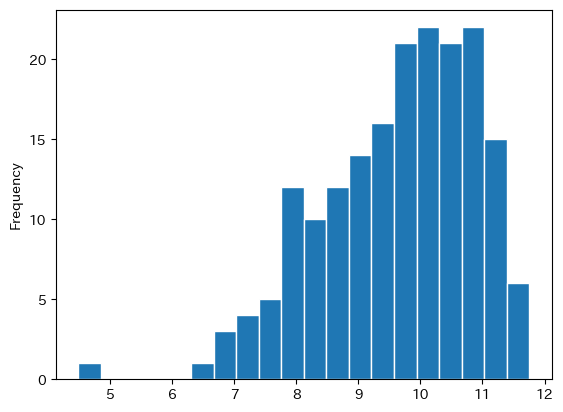

In [8]:
cond = ( pwt.loc[:,'year']==latest_yr )
pwt.loc[cond,'gdp_pc_log'].plot.hist(bins=20,
                                     edgecolor='white')
pass

ヒストグラムは縦軸に度数，横軸に階級を取ったグラフだが，関連する手法に[カーネル密度推定](https://en.wikipedia.org/wiki/Kernel_density_estimation)と呼ばれるものがある。考え方は簡単で，上のようなヒストグラムのデータに基づき面積が１になるようにスムーズな分布を推計する手法である。詳細は割愛するが，下のコードではヒストグラムとカーネル密度関数を重ねてプロットする。

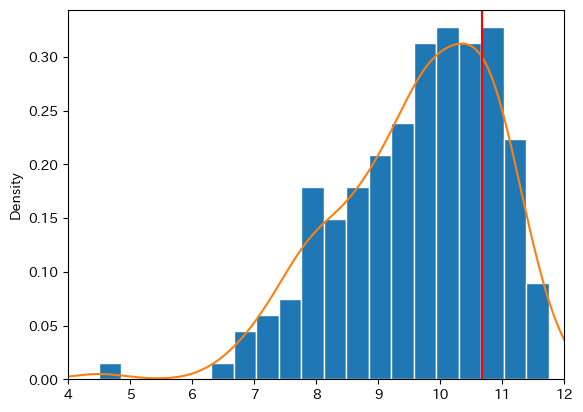

In [9]:
# 1 ヒストグラム
ax_ = pwt.loc[cond,'gdp_pc_log'].plot.hist(bins=20,
                                           edgecolor='white',
                                           density=True)

# 2 密度関数
pwt.loc[cond,'gdp_pc_log'].plot.density(ax=ax_)

# 3 日本
ax_.axvline(y_jp.iloc[0], color='red')

# 4 横軸の表示範囲
ax_.set_xlim(4,12)
pass

```{admonition} コードの説明
:class: dropdown

1. `density=True`は縦軸を確率として表示する引数
2. `kind='density'`は分布のスムーズな形を推定し表示する引数（密度関数を推定する）
3. `axvline()`は`ax_`のメソッドであり，横軸の第一引数の値に垂直線を表示する。`color`は色を指定する引数。
4. `set_xlim()`は横軸の表示範囲を指定する。
```

最頻値（モード）は中心より右側にあるが，横軸は対数になっていることを思い出そう。対数を取らない分布では，最頻値は分布の中心より左側に位置することになる。試してみよう。

ここで確かめたいのは，約70年の間に上の所得分布がどのように変化してきたか，という問題である。この問いに答えるために，カーネル密度関数（`kind=density`）を使って1950年から10年毎の分布を表示する。

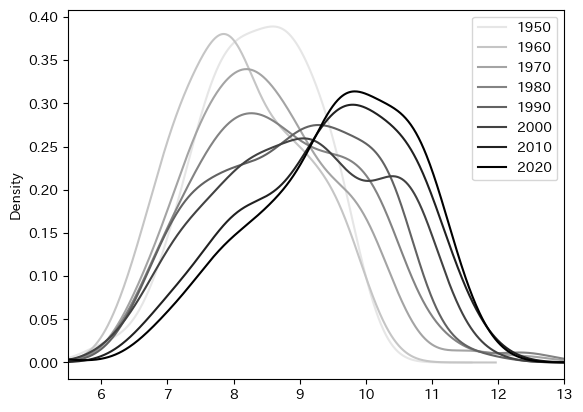

In [10]:
yr_list = list(range(1950,2021,10))                       # 1

color_arr = np.linspace(0.9,0,len(yr_list))               # 2

for y, c in zip(yr_list, color_arr):                      # 3
    cond = ( pwt.loc[:,'year'] == y )                     # 4
    ax_ = pwt.loc[cond,'gdp_pc_log'].plot.density(        # 5
                                          label=str(y),   # 6
                                          legend=True,    # 7
                                          color=str(c))   # 8

ax_.set_xlim([5.5,13.0])                                  # 9
pass

````{admonition} コードの説明
:class: dropdown

1. `range(start, end, step)`は`start`から`end`までの整数を`step`の間隔で準備する。更に`list()`を使ってリストに変換している。
2. グレーの濃淡で曲線の色指定するが，その場合`0`（黒）から`1`（白）の間の浮動小数点型を文字列型で指定する。そのために使う数字を用意している（後で文字列に変換する）。`np.linspace(0.9,0,len(yr_list))`は`0.9`から`0`までの数字（降順）で`yr_list`の要素と同じ数の値を生成し`array`として`color_arr`に割り当てている。
3. `zip`は引数の`yr_list`と`color_arr`の順番が同じ要素を一つのタプルにまとめる関数である。例えば，`list(zip(yr_list,color_arr))`はタプルが要素となるリストを返す。
    ```
    [(1950, 0.9),
     (1960, 0.7714285714285715),
     (1970, 0.6428571428571428),
     (1980, 0.5142857142857142),
     (1990, 0.3857142857142857),
     (2000, 0.2571428571428571),
     (2010, 0.12857142857142845),
     (2020, 0.0)]
    ```
    このように`zip`関数は複数のリストや`array`の要素をタプルとしてまとめている。`for`ループが始まると，`0`番目の要素`(1950, 0.9)`を使い`y`に`1950`，`c`に`0.9`が割り当てられ，その下のコードが実行される。同様に次のループでは`1`番目の要素`(1960, 0.7714285714285715)`を使い`y`に`1960`，`c`に`0.7714285714285715`が割り当てられ，その下のコードが実行される。同じ作業が`(2020, 0.0)`まで続くことになる。
4. 列`year`で`y`と等しい行が`True`，そうでない行は`False`となる`Series`を`cond`に割り当てる。
5. 列`'gdp_pc_log'`で`y`に該当する年の行を抽出し，密度関数を表示する。また，その「軸」を`ax_`に割り当てる。
6. 凡例の表示を`y`の文字列とする。
7. 凡例の表示を指定する。
8. `c`を文字列に変換しグレーの濃淡を指定する。
9. `ax_`のメソッドである`set_xlim()`は横軸の表示範囲を指定する。
    * 最小値，最大値をリストもしくはタプルで指定する。
    * `set_xlim()`が設定されない場合は，自動で設定される。
````

まず分布は左から右に移動しているが，これは世界経済が成長している結果である。次に気づくのが，分布が左に偏っているが少しずつ右への偏りに変化しているように見える。これを数値として確かめるために歪度（わいど; skewness）という概念を使おう。歪度は平均や標準偏差のように簡単に計算できる統計量であり，次のように定義される。

$$
S=\frac{n}{(n-1)(n-2)}
    \sum_{i=1}^n
    \left(
        \frac{
            x-\overline{x}
            }{s}
    \right)^3
$$

ここで$n$は標本の大きさ，$\overline{x}$は標本平均，$s$は標本標準偏差である。{numref}`fig:7-skewness`を使って歪度を説明しよう。
* $S>0$：「正の歪み」がある分布と呼ばれる。
    * 「左に偏った」とも呼ばれる。
    * 紛らわしいが，右裾が長くなっているため「右の歪み」とも呼ばれる。
* $S<0$：「負の歪み」がある分布と呼ばれる。
    * 「右に偏った」とも呼ばれる。
    * 紛らわしいが，左裾が長くなっているため「左の歪み」があるとも呼ばれる。
* $S=0$：左右対称分布

```{figure} /images/skewness.jpeg
---
scale: 20%
name: fig:7-skewness
---
Sの符号と分布の歪み（偏り）の関係
```

もしキャッチアップが起こると，一人当たりGDPが低い経済はより高い所得を得る経済に近づき，所得が比較的に高い国が増えることになる。従って，キャッチアップによって左側の分布から右側の分布に移り，それにつれて$S$は減少すると考えられる。では実際に歪度の推移を計算してみよう。

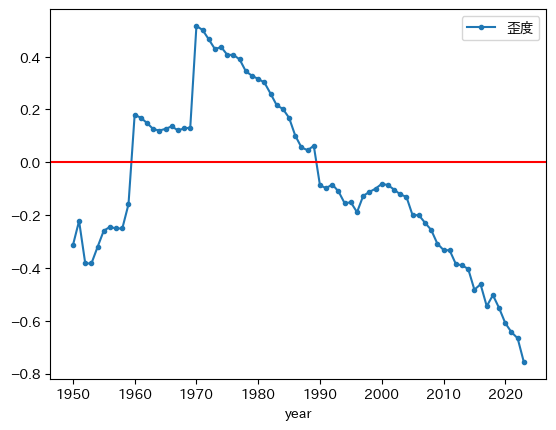

In [11]:
ax_ = pwt.groupby('year')['gdp_pc_log'].skew().plot(marker='.',  # 1
                                                    legend=True, # 2
                                                    label='歪度') # 3
ax_.axhline(0, color='red')  # 4
pass

```{admonition} コードの説明
:class: dropdown

1. 列`year`でグループ計算をおこなう。計算対象となる列は`gdp_pc_log`となり，計算方法はとして`.skew()`を使い歪度を計算する。ここでは`Series`が返される。
    * `[gdp_pc_log]`とすると`Series`を返す。
    * `[[gdp_pc_log]]`とすると`DataFrame`を返す。
    `Series`のメソッド`plot`を使い図示するが，マーカーに`'.'`を指定する。
2. `legend=True`は`Series`の場合に凡例を表示する際に必要となる。
3. `label='歪度'`は凡例を変更する（`Series`の場合に有効）。
4. `ax_`のメソッド`.axhline()`を使い`0`に赤の横線を引く。
```

````{tip}
上のコードでは`Series`が返されているが，`DataFrame`を返す場合は次のように書ける。

```
ax_ = pwt.groupby('year')[['gdp_pc_log']].skew().rename(columns={'gdp_pc_log':'歪度'}).plot(marker='.')
ax_.axhline(0, color='red')
```
凡例の表示を変更するために列ラベルを「歪度」に変更している。
````

````{admonition} forループで書く場合
:class: dropdown

```
year_list = pwt.loc[:,'year'].unique()

skew_list = []

for yr in year_list:                       # 1
    
    cond = ( pwt.loc[:,'year']==yr )       # 2
    s = pwt.loc[cond, 'gdp_pc_log']        # 3
    
    # 歪度
    skew_val = s.skew()                    # 4
    skew_list.append( skew_val )           # 5

ax_ = pd.DataFrame({'歪度':skew_list},      # 6
                   index=year_list) \
                  .plot(marker='.')        # 7
ax_.axhline(0, color='red')                # 8
```
1. `year_list`に対して`for`ループの開始。
2. 列`year`が`yr`と同じ場合は`True`となり，そうでない場合は`False`となる`Series`を返し`cond`に割り当てる。
3. 列`gdp_pc_lo`で`cond`がTrue`となる行を`Series`として抽出し`s`に割り当てる。
4. `s`のメソッド`.skew()`を使い，`s`の歪度を計算し`skew_val`に割り当てる。
5. `skew_val`を`skew_list`に割り当てる。
6. `skew_list`からなる`DataFrame`を作成し，`year_list`を行インデックスに指定する。また(8)で`.plot()`によって生成される「軸」を`ax_`に割り当てる。
7. プロットのマーカーを`'o'`（点）に指定する。
8. `ax_`のメソッド`.axhline()`を使い`0`に赤の横線を引く。

`.groupby()`の便利さとパワフルさが実感できるのではないだろうか。
````

次の特徴がある。
* 1970年以降は減少トレンドが確認できる。このことからキャッチアップが発生していることを示唆している。また1990年頃を境に「正の歪み」から「負の歪み」に変化している。
* 1960年，1970年，1990年に上方・下方ジャンプが発生している。これは以下で確認するように，`gdp_pc_log`が`NaN`ではない国の数が大きく増加しているためである。
* 1970年前だけを考えると，歪度は上昇トレンドとなっている。これも欠損値がない国の数の変化による影響とも考えられる。

これらの点を考えるために`gdp_pc_log`が`NaN`ではない国の数を確認しよう。次のコードは，最新年に`gdp_pc_log`が欠損値ではない国の数を返している。

In [12]:
cond = ( pwt.loc[:,'year']==latest_yr )   # 1
pwt.loc[cond,'gdp_pc_log'].notna().sum()  # 2

185

```{admonition} コードの説明
:class: dropdown

`notna()`は要素が`NaN`かどうかを調べるメソッドである。要素が`NaN`でなければ`True`を返し，`NaN`であれば`False`を返す。`notna`は英語の`not na`のことであり，`na`は`not available`の略で欠損値のこと。`True`は`1`と数えられるので，メソッド`sum()`を使うことにより`True`の数，即ち，`NaN`ではない要素の数を返す。
```

次に`for`ループを使って全ての年で`gdp_pc_log`に欠損値がない国の数を確認してみる。

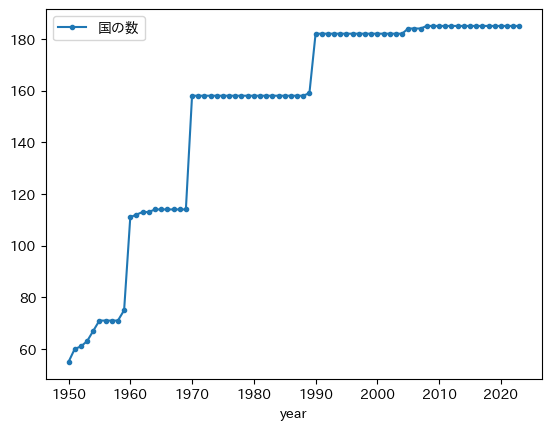

In [13]:
pwt.groupby('year')['gdp_pc_log'].count().plot(marker='.',
                                               label='国の数',
                                               legend=True)
pass

```{admonition} コードの説明
:class: dropdown

1. 列`year`でグループ計算をおこなう。計算対象となる列は`gdp_pc_log`となり，計算方法はとして`count()`を使い非欠損値の数を計算する。ここでは`Series`が返される。
    * `[gdp_pc_log]`とすると`Series`を返す。
    * `[[gdp_pc_log]]`とすると`DataFrame`を返す。
    `Series`のメソッド`plot`を使い図示するが，マーカーに`'.'`を指定する。
2. `legend=True`は`Series`の場合に凡例を表示する際に必要となる。
3. `label='国の数'`は凡例を変更する（`Series`の場合に有効）。
4. `ax_`のメソッド`.axhline()`を使い`0`に赤の横線を引く。
```

````{admonition} forループで書く場合
:class: dropdown

```
year_list = pwt.loc[:,'year'].unique()
notna_list = []

for yr in year_list:
    cond = ( pwt.loc[:,'year']==yr )                # 1
    no = pwt.loc[cond, 'gdp_pc_log'].notna().sum()  # 2
    notna_list.append(no)

pd.DataFrame({'国の数':notna_list}, index=year_list).plot(marker='.')
```

1. 列`year`が`yr`と等しい行が`True`となり，そうでない行は`False`となる`Series`を返す。
2. `gdp_pc_log`の列で`cond`が`True`の行を`Series`としてを返す。そのメソッド`.notna()`は欠損値でない場合は`True`を返し，欠損値の場合は`False`を返す。`.sum()`は`True`の数を返し`no`に割り当てる。
````

上の図から`gdp_pc_log`が欠損値でない国は増加しており，1960年，1970年，1990年に大きく増えている。データが整備されている国は典型的に先進国であり，後から含まれる国は比較的に所得が低い経済である。従って，貧しい国が所得分布に含まれることにより，分布は左側に引っ張られる傾向にある。特に，1950年から1960年には徐々に国の数は増えているが，それが歪度の上昇につながっていると考えられる。また1960年と1970年の国の数の急激な増加が歪度の上方ジャンプとして現れている。このようなことから，1970年までの歪度の上昇トレンドは，貧しい経済がPWTのデータセットに含まれることによって引き起こされており，豊かな国と比較して貧しい国が引き離されているからではない。一方で，1970年以降も国の数は膨らんでいるが，それにも関わらず歪度は減少傾向を示しているということはキャッチアップが発生していることを示唆している。典型的な例は，台湾，シンガポール，香港，韓国，中国やインドなどである。

分布の形の変化を確認するために歪度を使ったが，キャッチアップを捉える統計量として変動係数を考えてみよう。変動係数は分布の広がりを示す統計量であり，次のように定義される。

$$
\text{変動係数（Coefficient of Variation）}＝\dfrac{\text{標準偏差}}{\text{平均}}
$$

変動係数は平均値１単位あたりの標準偏差を表しており，平均値を使って標準化することにより分布の幅の程度を比べることが可能となる。キャッチアップにより経済間お所得格差を示す変動係数は減少すると予想される。次のコードを使って変動係数の推移を計算してみよう。

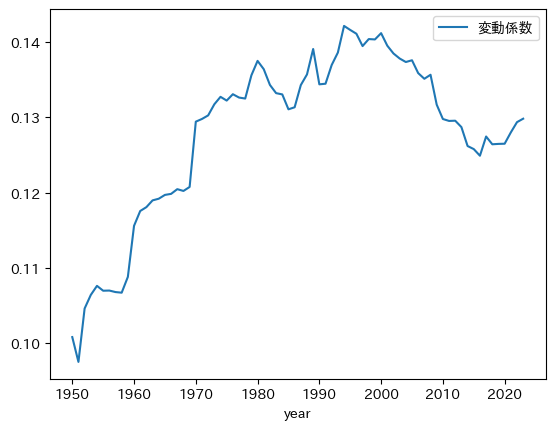

In [14]:
def cv(x):                   # 1
    return x.std()/x.mean()

pwt.groupby('year')['gdp_pc_log'].agg(cv).plot(legend=True,    # 2
                                               label='変動係数') # 3
pass

```{admonition} コードの説明
:class: dropdown

1. 変動係数を計算するメソッドが用意されていないので，ユーザー定義の関数を作成する。
2. 列`year`でグループ計算をおこなう。計算対象となる列は`gdp_pc_log`となる。関数`cv`を使うためにメソッド`agg()`を使う。ここでは`Series`が返される。
    * `[gdp_pc_log]`とすると`Series`を返す。
    * `[[gdp_pc_log]]`とすると`DataFrame`を返す。
    `Series`のメソッド`plot`を使い図示するが，凡例表示を指定する。
3. `label='変動係数'`は凡例を変更する（`Series`の場合に有効）。
```

````{admonition} forループの場合
:class: dropdown

```
year_list = pwt.loc[:,'year'].unique()
cv_list = []   # 空のリスト

for yr in year_list:
    cond = ( pwt.loc[:,'year']==yr )
    s = pwt.loc[cond, 'gdp_pc_log']
    stdev = s.std()                 # 1
    avr = s.mean()                  # 2
    cv = stdev / avr                # 3
    cv_list.append(cv)

df_cv = pd.DataFrame({'CV':cv_list}, index=year_list)  # 4
```

1. `s`は`cond`の条件を満たす`gdp_pc_log`の列の要素からなる`Series`だが，そのメソッド`.std()`を使い標準偏差を計算し`stdev`に割り当てる。
2. `s`のメソッド`.mean()`を使い平均を計算し`avr`に割り当てる。
3. 変動係数を計算し`cv`に割り当てる。
4. `index=year_list`は行インデックスにyear_listを設定しており，それにより，次のコードでは自動的に横軸が年になる。
````

````{tip}
関数`cv`の代わりに`lambda`関数を使うと１行のコードで図が描ける事になる。
```
pwt.groupby('year')['gdp_pc_log'].agg(lambda x: x.std()/x.mean()).plot(legend=True,label='変動係数')
```
ちなみに，１行コードをone linerと英語で表現する。注意する点は，one linerが必ずしも良いとは限らないという点である。可読性が損なわれる場合があるためである。
````

サンプルに含まれる国の数が徐々に増えており，その影響により変動係数は増える傾向にある。1990年ごろにはデータセットに含まれる国の数は安定し，その後直ぐに変動係数は減少し始めている。即ち，少なくとも1990年代半ば頃から変動係数で測る経済間の所得格差は減少している。変動係数を見る限りキャッチアップの効果が1990年代から現れていると言える。一方で，2010年代中頃から，変動係数で測った所得格差は拡大傾向にある。

上で扱った変動係数は経済間における所得格差を表す指標として解釈することができるが，その場合次の点に注意する必要がある。
* 分析の対象は国であり，それぞれの国の一人当たりGDPのみを考えた。中国やインドのように大きな国も，ルクセンブルクやシンガポールのように小さな国も１つの経済として扱っている。この場合の変動係数は，全ての国には一人だけしか住んでいないと仮定した場合の経済間の所得格差と同じであり，**国内**の人口や所得不平等やは全く考慮されていない。

## 所得収斂

(sec:9-convergence)=
## 所得収斂

### 説明

ここでは問３を回帰分析の手法に基づき検討する。問３を捉えるにはどのような回帰式になれば良いだろうか？ヒントはソロー・モデルにある。式[](eq:8-kgrowth)（以下に再掲）は一人当たり資本ストックの成長率を示している。

$$
\frac{k_{t+1}}{k_t}-1 = \frac{sAk_t^{-(1-a)}-(n+d)}{1+n}
$$ (eq:9-kgrowth)

$k_t$が増加すると右辺は減少する。即ち，資本ストックが多い経済の資本の成長率は低く，資本ストックが少ない経済の資本の成長率は高いと予測する。では一人当たりGDPではどうだろう。式[](eq:8-ygrowth)（以下に再掲）が成長率を示すが，同様の結果である。

$$
\frac{y_{t+1}}{y_t}-1
=\left(\frac{k_{t+1}}{k_t}\right)^{\alpha}-1
$$ (eq:9-ygrowth)

$k_t$と$y_t$は同じ方向に動くので，所得水準が高ければ成長率は低く，所得水準が低ければ成長率は高くなることが分かる。この点を捉えるために，$T=t_0-t$期間のデータに基づく次の推定式が想定できる。

$$
(T\text{期間の平均成長率})_i = a + b\times(t_0\text{における一人当たりGDP（対数）})_i + u_i
$$ (eq:9-absolute_convergence)

説明変数は初期時点（$t_0$）の一人当たりGDPであり，その後の$T$期間における平均成長率が左辺の被説明変数となっており，式[](eq:9-ygrowth)の関係を反映している。$i$は経済を表すとして推定値$\hat{b}$が**負**の値であれば，キャッチアップが起こっていることが確認できることになる。次のように定義としてまとめよう。

> ＜絶対的所得収斂＞
>
> 資本ストックが多い（豊かな）国の一人当たりGDPの成長率は低く，資本ストックが少ない（貧しい）国の一人当たりGDPの成長率は高い。

絶対的所得収斂は，貧しい国が豊かな国をキャッチアップすることを意味している。

ここで重要な注意点が一つある。マラソンを想像しよう。トップの選手が折り返し地点に達した時点で，最後尾の選手が走った距離はゴールまでの半分以下である。しかし最後尾の選手がトップ選手よりも速く走り，その状態が続けばゴールまでに追いつくか，もしくはゴールまでにトップ選手との距離を縮めることができる。このマラソンの話の中で前提になっているのが，「全ての選手にとってゴールは同じ」だということである。走った距離を一人当たりGDPの水準，走っている速度を成長率と考え所得収斂の話しに戻すと，マラソンのゴールに対応するのが長期均衡である定常状態である。定常状態が同じという状態は，式[](eq:8-kss)と[](eq:8-yss)が示す様に，５つのパラメータ（$s$，$A$，$a$，$n$，$d$）が同じ状態である。それが成立する場合にキャッチアップが発生することを意味しているのが絶対的所得収斂である。

もう一度マラソンの話に戻そう。選手ごとにゴールが違ったらどうだろう。もうマラソンとは言えないが，選手が走った距離だけでは追いついているのかどうかを語れなくなり，他の情報が必要になる。特に，ゴールの位置，そしてゴールまでの距離である。同様に，それぞれの経済のパラメータの値が異なり定常状態が違えば，キャチアップしているかは式[](eq:9-absolute_convergence)では判断できなくなる。では，定常状態の違いを捉える経済構造を反映する変数$X_i$を加えた次式であれば良いのだろうか。

$$
(T\text{期間の平均成長率})_i = a + cX_i + b\times(t_0\text{における一人当たりGDP（対数）})_i + u_i
$$ (eq:9-conditional_convergence)

推定値$\hat{b}$が**負**の値を取った場合の解釈を考えてみよう。変数$X_i$により，$\hat{b}$は定常状態（ゴール）の位置や定常状態までの「距離」がコントロール（考慮）された推定値となっている。従って，推定値$\hat{b}$は，定常状態までの残りの「距離」が遠ければ成長率は高く，残りの「距離」がが短ければ成長率は低い，ということを示している。これで経済間のキャッチアップを捉えているのだろうか。答えは「否」である。この点を説明するために，貧しい国の定常状態は豊かな国のそれよりも低いケースを考えてみよう。この場合，長期的に絶対的所得収斂は発生しないことは明らかである。しかし，貧しい国は定常状態から遠く離れ，一時的に豊かな経済よりも成長速度が高いことはあり得るのである。即ち，推定値$\hat{b}$が**負**の値であっても絶対的所得収斂は成立しない可能性は排除できないのである。

絶対的所得収斂をマラソンに例えたが，２つには決定的な違いがある。マラソンはゴールに到達する順番が重要である。選手毎にゴールの位置が違う「変形マラソン」でも同じである。一方，所得収斂では定常状態に到達する順番は重要ではない。重要なのな定常状態（ゴール）の**位置**である。長期的に所得が収斂するかは定常状態の位置で決定され，定常状態の到達順位は全く関係ない。従って，定常状態が異なることが前提となる式[](eq:9-conditional_convergence)の推定値$\hat{b}$は問３についての明白な答えとはならない。もちろん式[](eq:9-conditional_convergence)を推定する意味がないということではない。推定値$\hat{c}$は，成長率に対する経済構造の違いを明らかにする事になる。

```{admonition} 条件付き所得収斂
:class: warning
回帰式[](eq:9-conditional_convergence)の推定値$\hat{b}$が統計的に有意な負の値を取る場合を**条件付き所得収斂**呼ぶ。しかし説明したように，所得収斂には無関係の値であり誤解を招きやすい用語となっている。
```

### 推定式の導出

推定式[](eq:9-absolute_convergence)と[](eq:9-conditional_convergence)はソロー・モデルに基づいている。具体的には，式[](eq:8-y_difference_eq)は，ソロー・モデルの均衡式を定常状態の近傍で線形近似して導出された$y_t$の差分方程式だが，この式を整理すると推定式が導出される。この節では導出方法を示すのが目的であり，技術的なものに興味がなければ次に進んでも良いだろう。

式[](eq:8-y_difference_eq)を1期ずらして次のように書き換える。

$$
y_t-y_{t-1}=\lambda(y_*-y_{t-1})
$$

更に両辺を$y_{t-1}$で割り，$\log(1+x-1)\approx x-1$の近似を使い整理すると次式となる。

$$
m_t=(1-\lambda)m_{t-1}+\lambda m_*
$$

ここで

$$
m_t\equiv\log(y_t)
$$ (eq:9-mt)

次に逐次的代入をおこなう。

$$
\begin{align*}
m_t
&=(1-\lambda)m_{t-1}+\lambda m_* \\
&=(1-\lambda)[(1-\lambda)m_{t-2}+\lambda m_*]+\lambda m_* \\
&=(1-\lambda)^2m_{t-2}+[(1-\lambda) + 1]\lambda m_* \\
&=(1-\lambda)^2[(1-\lambda)m_{t-3}+\lambda m_*]+[(1-\lambda) + 1]\lambda m_* \\
&=(1-\lambda)^3m_{t-3}+[(1-\lambda)^2+(1-\lambda)+ 1]\lambda m_* \\
&=\quad\vdots \\
&=(1-\lambda)^tm_{0}+\lambda m_*\sum_{i=0}^{t-1}(1-\lambda)^i \\
&=(1-\lambda)^tm_{0}+\left[1-(1-\lambda)^t\right]m_*
\end{align*}
$$

両辺から$m_0$を引き，$t$で割り，式[](eq:9-mt)を使うと次式を得る。

$$
\frac{1}{t}\log\left(\frac{y_t}{y_0}\right)
=a + b\log(y_0)
$$ (eq:9-regression)

$$
a\equiv\frac{1-(1-\lambda)^t}{t}\log(y_*)>0,
$$ (eq:9-a)

$$
b\equiv\frac{(1-\lambda)^t-1}{t}<0
$$ (eq:9-b)

式[](eq:9-regression)の左辺は$t$期間の一人当たりGDPの平均成長率であり，右辺には定数項と初期の一人当たりGDP（対数）が説明変数として配置されている。式[](eq:9-regression)が推定式[](eq:9-absolute_convergence)と[](eq:9-conditional_convergence)と同じであることは明白である。

２つ重要な点がある。
* 定数項$a$は一人当たりGDPの定常値$y_*$によって決定される。ソロー・モデルにおける定常値は式[](eq:8-yss)であり，パラメータである貯蓄率$s$，労働人口増加率$n$そして資本減耗率$d$に依存している。より一般的に考えると，定数項$a$は経済構造を捉えるあらゆる変数に依存しているとも考えられる。また式[](eq:8-lambda_g)で定義される$\lambda$にも依存する。
    * 推定式[](eq:9-absolute_convergence)は全てのパラメータが同じであることを仮定している。
    * 推定式[](eq:9-conditional_convergence)は式[](eq:9-a)の違いを捉えるために$X_i$が含まれている。
* パラメータ$b$は$\lambda$に依存しており，次式を使い推定値$\hat{b}$から収束速度$\lambda$を計算できる。

    $$
    \lambda=1-(1+bt)^{\frac{1}{t}}
    $$ (eq:9-lambdahat)

### 推定結果の判断方法

次の順序で推定する。
1. 回帰式[](eq:9-absolute_convergence)推定する。
    * $\hat{b}$が負であり統計的有意性が高ければ，絶対的所得収斂を示唆する結果として次に進む。
2. 回帰式[](eq:9-conditional_convergence)推定する。
    * $\hat{b}$が負であり統計的有意性が高く，また他の説明変数の有意性が低ければ絶対的所得収斂が成立すると判断する（$F$検定）。
    * その他の場合は絶対的所得収斂は成立しないと判断する。

In [15]:
from myst_nb import glue
latest_year = int( pwt['year'].max() )
glue("latest_year_glued", latest_year)

2023

### 単回帰分析：1970年〜{glue:text}`latest_year_glued`年

(sec:9-simple_regression)=
### 単回帰分析：1970年〜{glue:text}`latest_year_glued`年

#### データ

ここではPenn World Talbeに含まれる次の変数を使う。後で使う変数も含めてデータを整形することにしよう。

* `rgdpna`：GDP（国民計算）
    * 平均成長率の計算に使う
* `cgdpo`：GDP（生産側）
    * 初期時点の一人当たりGDPの計算に使う
* `emp`：雇用者数
    * 労働人口の代わりに使う。
    * 労働人口増加率$n$の計算に使う。
    * 平均増加率として定常状態を捉える変数として使う。
* `csh_i`：GDPに対しての資本形成の比率
    * 投資の対GDP比である。
    * 貯蓄率$s$の代わりに使う。
    * 平均値を定常状態を捉える変数として使う。
* `delta`：資本ストックの年平均減耗率
    * 平均値を定常状態を捉える変数として使う。

最初に1970年以降のデータを抽出する。

In [16]:
df1970 = py4macro.data('pwt').query('year >= 1970')

##### 貯蓄率・雇用者数の増加率・資本減耗率の平均

(sec:9-saving)=
##### 貯蓄率・資本減耗率・労働人口増加率の平均

1970年以降の貯蓄率，資本減耗率の平均，労働人口増加率を計算するが，[ソロー・モデル](sec:8-data)の章で使ったコードを再利用することもできる。ここでは`.groupby()`を使った計算を紹介することにする。`.groupby()`を使いデータのグループ計算をする際，自作関数を使うことができる。まずその自作関数を定義しよう。

In [17]:
def mean_nan(x):         # 1
    
    if x.notna().all():  # 2
        return x.mean()  # 3
        
    else:
        return np.nan    # 4

```{admonition} コードの説明
:class: dropdown

1. `groupby()`に使うので，引数`x`は，各グループのデータと解釈する。
1. `.notna()`は`x`が欠損値でない場合に`True`を返し，欠損値の場合は`False`を返す。`x.notna()`はグループのデータを`True/False`として置き換えたデータを返すことになる。一方，`.all()`は全てが`True`であれば`True`を返し，１つ以上`False`があれば`False`を返す。従って，`x.notna().all()`はグループのデータに欠損値がなければ`True`を，１つでも`False`があれば`False`を返す。
1. グループ・データに欠損値がない場合にのみ，その平均を返す。
1. １つ以上`False`があれば`np.nan`を返す。ここで`np.nan`とは`NumPy`で生成する浮動小数点型であり，欠損値を示す`NaN`のことである。
```

以下では関数`mean_na()`を使いグループ計算することにしよう。

In [18]:
# 平均貯蓄率の計算
saving = df1970.groupby('country')[['csh_i']].agg(mean_nan).dropna()  # 1
saving.columns = ['saving_rate']

# 資本減耗率の平均の計算
depreciation = df1970.groupby('country')[['delta']].agg(mean_nan).dropna() # 2
depreciation.columns = ['depreciation']

```{admonition} コードの説明
:class: dropdown

1. ここで重要な点は，最後に`.dropna()`を使って`np.nan`で作られた欠損値の行を削除している点である。これにより1970年〜2019年まで全てのデータが揃っている国だけが含まれていることになる。
1. 同様のことが言える。
```

次に労働人口の平均成長率を計算するが，成長率を計算する必要があるので次の関数を定義する。

In [19]:
def mean_growth_nan(x):
    
    t = len(x)-1
    
    if x.notna().all():
        x_growth = ( x.iloc[-1]/x.iloc[0] )**(1/t)-1  # 1
        return x_growth
        
    else:
        return np.nan

```{admonition} コードの説明
:class: dropdown

1 のみが`mean_na()`と異なる。ここではグループ・データ`x`を使い，平均成長率を計算している。`x.iloc[-1]`は2019年の値であり，`x.iloc[0]`は1970年のデータとなっている。また`len(x)`は`x`の行数を返しており，ここでは`2019-1970+1=50`と同じである。`50`年間の平均成長率であることがわかる。
```

この関数を使い労働人口の平均増加率を計算しよう。

In [20]:
emp_growth = df1970.groupby('country')[['emp']].agg(mean_growth_nan).dropna()
emp_growth.columns = ['emp_growth']

ここでも`.dropna()`を使い欠損値を削除し，全ての年でデータが揃っている国だけを抽出している。

##### 一人当たりGDP成長率の平均

まず一人当たりGDPの列を作成する。

In [21]:
df1970['rgdpna_pc'] = df1970.loc[:,'rgdpna']/df1970.loc[:,'emp']

平均成長率は関数`mean_growth_nan()`を使い，労働人口の平均増加率の計算と同じ方法で計算しよう。

In [22]:
growth = df1970.groupby('country')[['rgdpna_pc']].agg(mean_growth_nan).dropna()
growth.columns = ['gdp_pc_growth']

##### 1970年の一人当たりGDP

３つの列`country`，`cgdpo`，`emp`からなる回帰分析用の`DataFrame`として`df_convergence`を作成する。

In [23]:
df_convergence = df1970.query('year == 1970').loc[:,['country','cgdpo','emp']]

`df_convergence`に上で作成した貯蓄率などの`DataFrame`を結合していくが，その前に1960年の一人当たりGDP（対数）の列を付け加えよう。

In [24]:
df_convergence['gdp_pc_init_log'] = np.log( df1970.loc[:,'cgdpo']/df1970.loc[:,'emp'] )

必須ではないが，２つの列`country`と`gdp_pc_init`とだけからなる`DataFrame`に整形する。その際，欠損値がある行は削除し，`country`を行ラベルに設定する。

In [25]:
df_convergence = df_convergence.loc[:,['country','gdp_pc_init_log']] \
                               .set_index('country') \
                               .dropna()

##### `DataFrame`の結合

上で作成した`DataFrame`を結合するが，`df_convergence`にまとめることにする。

In [26]:
for df_right in [saving, depreciation, emp_growth, growth]:
    df_convergence = pd.merge(df_convergence, df_right,
                              left_index=True,
                              right_index=True,
                              how='outer')

最後に欠損値がある行は全て削除する。

In [27]:
df_convergence = df_convergence.dropna()

確認してみよう。

In [28]:
df_convergence.head()

,gdp_pc_init_log,saving_rate,depreciation,emp_growth,gdp_pc_growth
country,,,,,
Albania,9.134868,0.201082,0.029913,0.008899,0.020056
Algeria,10.901052,0.346731,0.041813,0.033894,0.000888
Angola,9.192882,0.333011,0.040357,0.032327,-0.005020
Argentina,9.417543,0.149075,0.034190,0.018609,-0.000475
Australia,10.908412,0.269972,0.028579,0.017565,0.012146


#### 成長率の分布

平均成長率のヒストグラムを図示してみよう。

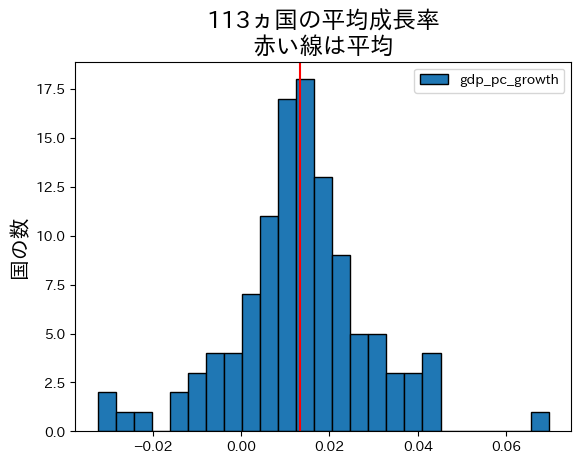

In [29]:
growth_avr = df_convergence.loc[:,'gdp_pc_growth'].mean()  #1

ax = df_convergence.plot.hist(y='gdp_pc_growth',           #2
                              bins=25, edgecolor='k')      #3
ax.axvline(growth_avr, color='red')                        #4
ax.set_ylabel('国の数', size=15)                            #5
ax.set_title(
    f'{len(df_convergence)}ヵ国の平均成長率\n赤い線は平均',     #6
    size=17)                                               #7
pass

```{admonition} コードの説明
:class: dropdown

* `#1`：平均成長率の平均を計算し，結果を変数`growth_avr`に割り当てている。
* `#2`：`df_convergence`を使い`gdp_pc_growth`のヒストグラムをプロットし、軸を`ax`に割り当てる。
* `#3`：`bins`は階級の数を指定する引数（ここでは`25`）。`edgecolor`はヒストグラムの棒の枠線の色を指定する引数で，`k`は黒を示す。`black`としても構わない。
* `#4`：`axvline()`は縦の線を引く`ax`のメソッド
    * 第一引数は横軸の値
    * `color`は色を指定する引数
* `#5`：軸のタイトルを設定する`ax`のメソッドが`.set_title()`。
    * `size`はフォントの大きさを指定する。
* `#6`：軸のタイトルを設定する。
    * `f-string`を使って`{}`の中に`len(df_reg)`を代入している。
* `#7`：`size`はフォントの大きさを指定する。
    
上のヒストグラムは[発展会計](chap:5a-accounting)の章の「はじめに」で表示したヒストグラムと次の点で異なる。
* `df_convergence`は1970年以降のデータを使っている，「はじめに」のヒストグラムは1960年以降のデータを使っている。
* `df_convergence`では労働者一人当たりGDPの成長率を使っているが，「はじめに」のヒストグラムは人口一人当たりGDPの成長率を使っている。前者は生産性，後者厚生を表していると解釈できる。
* `df_convergence`は`DataFrame`のメソッド`.pivot()`を使いデータ整形をおこなったが，「はじめに」のヒストグラムでは`DataFrame`のメソッド`.groupby`を使っており，それを使うと国ごとの統計量を簡単に計算することができる。詳細については[このサイト](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)を参照するか，「pandas groupby」で検索してみよう。
```

ヒストグラムの右端に平均成長率が`6`％以上の国がある，調べてみよう。

In [30]:
df_convergence.loc[:,'gdp_pc_growth'].sort_values(ascending=False).head()

country
China                0.069675
Taiwan               0.044693
Republic of Korea    0.044466
Myanmar              0.043783
Mali                 0.043698
Name: gdp_pc_growth, dtype: float64

中国だということがわかる。

次に，何％の国で平均を下回るか確認してみよう。

In [31]:
( df_convergence.loc[:,'gdp_pc_growth'] < growth_avr ).sum() / len(df_convergence)

0.48672566371681414

半分近くの国の成長率は平均より低いことになる。しかし上でも説明したが，キャッチアップが起こっているかは平均の成長率との比較では確認できない。一方で，平均成長率が負の国もあり，それらの国は経済が縮小しており先進国に追いついているとは言えない。では，**平均**で貧しい国は豊かな国に追いついているのだろうか？回帰分析で検討する。

#### 結果

(sec:9-regression_result)=
#### 結果

In [32]:
formula_absolute = 'gdp_pc_growth ~ gdp_pc_init_log'
res_absolute = smf.ols(formula_absolute, data=df_convergence).fit()
print(res_absolute.summary().tables[1])

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0821      0.011      7.300      0.000       0.060       0.104
gdp_pc_init_log    -0.0071      0.001     -6.147      0.000      -0.009      -0.005


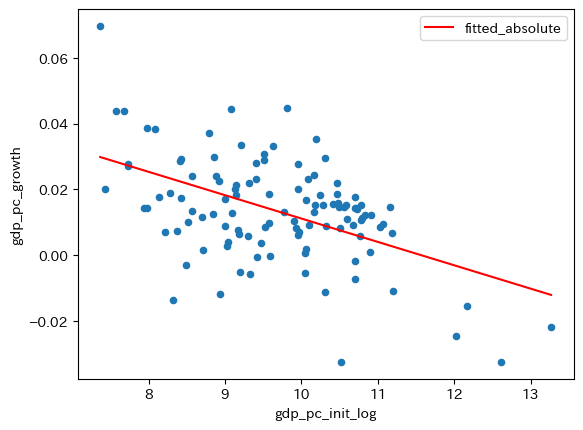

In [33]:
# 予測値の列の作成
df_convergence['fitted_absolute'] = res_absolute.fittedvalues

# 図示
ax_ = df_convergence.plot.scatter(x='gdp_pc_init_log',
                                  y='gdp_pc_growth')
df_convergence.sort_values('fitted_absolute') \
              .plot(x='gdp_pc_init_log',
                    y='fitted_absolute',
                    color='red',
                    ax=ax_)
pass

絶対的所得収斂が発生していることを示唆する結果になっている。しかし注意が必要な点がある。定常状態の**位置**の問題である。この回帰分析結果は，全ての国で定常状態が同じだということは示しておらず，むしろ，定常状態が全ての国で同一という仮定の下での推定結果である。次に，たの変数を含めた重回帰分析をおこなう必要があるが，その前に推定結果から所得収束速度計算してみよう。

#### 推定値$\hat{b}$の意味

実際に[上の回帰分析](sec:9-regression_result)の$b$の推定値を使って収束速度を計算してみることにする。

In [34]:
period = latest_yr - 1970
bhat = res_absolute.params.iloc[1]
speed1970 = 1-(1+bhat*period)**(1/period)

print(f'収束速度は約{100*speed1970:.3f}％です')

収束速度は約0.887％です


In [35]:
from myst_nb import glue
speed_1970 = 100 * speed1970
glue("speed_1970_glued", speed_1970)

0.887403465282377

この結果は，定常状態までの「距離」は年平均で約{glue:text}`speed_1970_glued:.3f`％減少することを意味する。ではこの数字をどう理解すれば良いだろうか。仮にもし絶対的所得収斂が成立しているとすると，この数字は大きいのだろうか，小さいのだろうか。この点を探るために，{glue:text}`latest_year_glued`年の米国と平均の一人当たりGDPを使って0.75％の意味を考えてみる。

In [36]:
df1970['gdp_pc'] = df1970.loc[:,'rgdpna']/df1970.loc[:,'emp']

cond = ( df1970.loc[:,'year']==latest_yr )
gdp_pc = df1970.loc[cond,'gdp_pc']
no = len(gdp_pc)                                      # 1
gdp_pc_mean = gdp_pc.mean()

cond = ( (df1970.loc[:,'year']==latest_yr) &          # 2
         (df1970.loc[:,'countrycode']=='USA') )
gdp_pc_us = df1970.loc[cond,'gdp_pc'].to_numpy()[0]   # 3

print('\n--- 最新年の一人当たりGDP ---------\n\n'
     f'{no}ヵ国の平均：\t{gdp_pc_mean:.1f}\n'           # 4
     f'米国：\t\t{gdp_pc_us:.1f}\n'
     f'米国は平均の{gdp_pc_us/gdp_pc_mean:.1f}倍')


--- 最新年の一人当たりGDP ---------

185ヵ国の平均：	55430.0
米国：		149081.9
米国は平均の2.7倍


```{admonition} コードの説明
:class: dropdown

1. `len()`は`DataFrame`の行数を返す。
2. `cond`は`True/False`の`Series`
    * 右辺は２行にまたがっているので，右辺の一番外側の`()`が必要となる。
    * `&`を使っているため`pwt.loc[:,'year']==latest_yr`と`pwt.loc[:,'countrycode']=='USA'`はそれぞれ`()`に入れる。
3. `pwt.loc[cond,'gdp_pc']`は`Series`を返すため，`.to_numpy()`で`Numpy`の`array`に変換し`0`番目の要素を抽出する。その抽出した値を`gdp_pc_us`に割り当てる。
4. `f-string`を使い`{}`に`no`，`gdp_pc_mean`，`gdp_pc_us`，`gdp_pc_us/gdp_pc_mean`の値を代入している。`:.1f`は小数点第一位までの表示を指定している。また`\t`はタブ。
```

この数字を使って，`n`年後に平均の経済が{glue:text}`latest_year_glued`年の米国との所得格差を何％縮めることができるかを計算してみよう。まず次の変数を使って簡単な数式を考えてみよう。
* $s$：収束速度（率）
* $x_0$：所得格差
* $x_t$：$t$期に残る所得差

1年後の格差は

$$x_1=x_0-sx_0=(1-s)x_0$$

であり，一般的には

$$x_{t}=(1-s)x_{t-1},\qquad t=1,2,3,\cdots$$

となり，逐次的に代入すると次式となる。

$$x_{t}=(1-s)^tx_{0}$$

この式を使って`n`年後に{glue:text}`latest_year_glued`年当時の格差が何％残っているかを関数としてまとめる。

In [37]:
def remaining_percent(n, s=speed1970):
    
    x0 = gdp_pc_us - gdp_pc_mean
    x = ( 1-s )**n * x0
    
    return 100 * x / x0

`for`ループを使って計算してみる。

In [38]:
print('\n--- X年後に残る最新年当時の所得格差 ----------\n')

for n in [10,20,50,100,200,300,500,1000]:
    print(f'{n}年後：{remaining_percent(n):.2f}％')


--- X年後に残る最新年当時の所得格差 ----------

10年後：91.47％
20年後：83.67％
50年後：64.04％
100年後：41.01％
200年後：16.82％
300年後：6.90％
500年後：1.16％
1000年後：0.01％


この計算から収束速度{glue:text}`speed_1970_glued:.3f`％の意味が理解できるたと思う。仮に絶対的所得収斂が成立したとしても，経済間の所得格差の解消には気が遠くなる程長い時間が掛かることを意味している。もちろんこの予測は過去50年間の経験がそのまま続いたらの話であり，GAFAやAI，中国の台頭やコロナ禍など今後様々な不確定要因が重なることを想定すると，この予測どおりにはならないだろうが，経済間の所得格差の解消は長い道のりであることは間違いなさそうである。

### 重回帰分析：1970年〜{glue:text}`latest_year_glued`年

(sec:9-multiple_regression)=
### 重回帰分析：1970年〜{glue:text}`latest_year_glued`年

[単回帰分析](sec:9-simple_regression)では絶対的所得収斂を示唆する結果が示された。しかし推定結果は，貯蓄率など全ての経済構造が同じだと仮定し推定をおこなった。この仮定を取り除いた場合，初期の一人当たりGDPの推定値$\hat{b}$は統計的有意性を保つことができるだろうか。そして他の変数の統計的有意性はどうだろうか。この点を確認するために，重回帰分析をおこなう。

In [49]:
formula_conditional = ( 'gdp_pc_growth ~ saving_rate +'
                                        'emp_growth +'
                                        'depreciation +'
                                        'gdp_pc_init_log' )

res_conditional = smf.ols(formula_conditional, data=df_convergence).fit()

print(res_conditional.summary().tables[1])

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0618      0.010      6.038      0.000       0.041       0.082
saving_rate         0.0800      0.015      5.443      0.000       0.051       0.109
emp_growth         -0.5655      0.071     -7.977      0.000      -0.706      -0.425
depreciation        0.4391      0.090      4.869      0.000       0.260       0.618
gdp_pc_init_log    -0.0075      0.001     -7.557      0.000      -0.009      -0.006


```{admonition} コードの説明
:class: dropdown

`formula_conditional`に回帰式が割り当てられているが，右辺は文字列が複数行にまたがっている。この場合は両端を`()`で囲み，文字列を一行毎`'`と`'`で囲む必要がある。もちろんシングル・クオート`'`の代わりにダブル・クオート`"`を使っても良い。
```

まず推定値の符号に関するソロー・モデルの予測を考えるために，式[](eq:8-kss)，[](eq:8-lambda)，[](eq:9-a)を使って定数項$a$を３つのパラメータで表してみる。

$$
a\equiv\frac{1}{t}
\left[
1-\left(
    1-\frac{(1-a)(n+d)}{1+n}
    \right)^t
\right]
\times
\log
\left(
     \frac{As}{n+d}
\right)^{\frac{1}{1-a}}
$$ 

この式から次のことが分かる。
* $a$は$s$の増加関数 $\Rightarrow$ `saving_rate`の係数は正の値と予想される。
* $a$は$n$の単調関数ではない $\Rightarrow$ `emp_growth`の係数に関する予想は不明確。
* $a$は$d$の単調関数ではない $\Rightarrow$ `depreciation`の係数に関する予想は不明確。

この予想に基づいて係数の統計的有意性を検討しよう。全ての係数の$p$値は非常に小さく統計的な有意性は高い。確認のために$F$検定を行ってみよう。ここでは次の帰無仮説と対立仮説を立てることにする。

$H_0$：貯蓄率，労働人口増加率，資本減耗率の推定値は全て`0`<br>
$H_A$：$H_0$は成立しない。

`statsmodels`を使って$F$検定をおこなう方法については[このサイト](https://py4etrics.github.io/11_Inference.html#f)参考にして欲しいが，ここでは簡単い説明する。まず帰無仮説を捉える制約式を設定しよう。

In [40]:
hypothesis = 'saving_rate = 0, emp_growth = 0, depreciation = 0'

３つの説明変数の推定値が全て同時に`0`だという制約式である。次に，回帰結果`res_conditional`には$F$検定をおこなうメソッド`.f_test()`が実装されている。使い方は簡単で，制約式である`hypothesis`を引数として渡すことで結果を表示できる。

In [41]:
print( res_conditional.f_test(hypothesis) )

<F test: F=32.41607992248101, p=5.076499126650329e-15, df_denom=108, df_num=3>


＜表示にある記号の意味＞<br>
`F`：$F$値<br>
`p`：$p$値<br>
`df_denom`：分母の自由度<br>
`df_num`：分子の自由度<br>

ここで興味があるのは$p$値であり，非常に小さい。従って，1%の有意水準であっても帰無仮説は棄却できる。データに含まれている全ての経済の定常値が同じとは言い難く，絶対的所得収斂が成立していると判断できない。

````{tip}
$F$検定の結果の値は属性として抽出できる。例えば，$p$値は次のコードでアクセスできる。
```
res_conditional.f_test(hypothesis).pvalue
```
````

### 単回帰分析：`for`ループで回帰分析

上の単回帰・重回帰分析は1970年〜{glue:text}`latest_year_glued`年のデータを使っている。他の期間ではどうだろうか。例えば，1980年〜{glue:text}`latest_year_glued`年。一回ずつ推定するのも面倒なので`for`ループを使って一気に計算してみよう。もしかすると何か見えて来るかも知れない。最終年は全てのパターンで{glue:text}`latest_year_glued`年として推定期間は次のようにしよう。
* 1950~{glue:text}`latest_year_glued`年
* 1951~{glue:text}`latest_year_glued`年
* ・・・
* ・・・
* 1980~{glue:text}`latest_year_glued`年
* ・・・
* ・・・
* 2010~{glue:text}`latest_year_glued`年

まず単回帰の場合を考え次の３つのステップに分けてコードを書いていく。
1. 関数`data_for_regression()`を作成する。
    * 引数
        * `init_yr`：年（例えば，1970）
        * `df`：`DataFrame`（デフォルトは`pwt`）
    * 戻り値
        * 次の変数から構成される`DataFrame`
            * `init_yr`から* 2008~{glue:text}`latest_year_glued`年までのデータから計算された`saving_rate`, `depreciation`, `emp_growth`, `gdp_pc_growth`
            * `init_yr`で指定された年の`gdp_pc_init_log`
1. `for`ループで`data_for_regression()`から生成される`DataFrame`を使い，次の４つの変数の推移を示す変数からなる`DataFrame`を作成する。
    * 初期時点の一人当たりGDP（対数）の係数の推定値
    * $p$値
    * 決定係数
    * 標本に含まれる国の数
1. ４つの変数の時系列プロット

ステップ１の`data_for_regression()`は基本的に上で使ったコードを関数としてまとめることで作成する。重回帰分析も後で行うので，貯蓄率などの平均値も含む`DataFrame`を返す関数とする。コード自体は上で使ったコードを再利用して関数にまとめている。

In [42]:
def data_for_regression(init_yr, df=pwt):
    
    # === groupby用の集計関数 ======================
    def mean_nan(x):
        if x.notna().all():
            return x.mean()
        else:
            return np.nan
    
    def mean_growth_nan(x):
        t = len(x)-1
        if x.notna().all():
            x_growth = ( x.iloc[-1]/x.iloc[0] )**(1/t)-1  # 1
            return x_growth
        else:
            return np.nan
        
    # === 初期時点の年からのDataFrameを作成 ======================
    cond = ( df['year']>=init_yr )
    df = df.loc[cond,:].copy()          # .copy()は警告が出ないようにする
    
    # === 平均貯蓄率の計算 ======================
    saving = df.groupby('country')[['csh_i']].agg(mean_nan).dropna()
    saving.columns = ['saving_rate']
    
    # === 資本減耗率の平均の計算 ======================
    depreciation = df.groupby('country')[['delta']].agg(mean_nan).dropna()
    depreciation.columns = ['depreciation']

    # === 労働人口成長率の平均の計算 ======================
    emp_growth = df.groupby('country')[['emp']].agg(mean_growth_nan).dropna()
    emp_growth.columns = ['emp_growth']

    # === 一人当たりGDP成長率の平均の計算 ======================
    df['rgdpna_pc'] = df.loc[:,'rgdpna']/df.loc[:,'emp']
    growth = df.groupby('country')[['rgdpna_pc']].agg(mean_growth_nan).dropna()
    growth.columns = ['gdp_pc_growth']

    # === 初期の一人当たりGDPの計算 ======================
    cond = ( df['year'] == init_yr )
    df_convergence = df.loc[cond,['country','cgdpo','emp']]    
    df_convergence['gdp_pc_init_log'] = np.log( df.loc[:,'cgdpo']/df.loc[:,'emp'] )
    df_convergence = df_convergence.loc[:,['country','gdp_pc_init_log']] \
                                   .set_index('country') \
                                   .dropna()

    # === DataFrameの結合 ======================
    for df_right in [saving, depreciation, emp_growth, growth]:
        df_convergence = pd.merge(df_convergence, df_right,
                                  left_index=True,
                                  right_index=True,
                                  how='outer')
        
    return df_convergence.dropna()

`init_yr=1970`として関数を実行して内容を確認してみよう。

In [43]:
data_for_regression(1970).head()

,gdp_pc_init_log,saving_rate,depreciation,emp_growth,gdp_pc_growth
country,,,,,
Albania,9.134868,0.201082,0.029913,0.008899,0.020056
Algeria,10.901052,0.346731,0.041813,0.033894,0.000888
Angola,9.192882,0.333011,0.040357,0.032327,-0.005020
Argentina,9.417543,0.149075,0.034190,0.018609,-0.000475
Australia,10.908412,0.269972,0.028579,0.017565,0.012146


ステップ２として，`for`ループを使って４つの変数からなる`DataFrame`を作成する。

In [44]:
b_coef_list = []     # 1
b_pval_list = []     # 2
rsquared_list = []   # 3
nobs_list = []       # 4
yr_list = []         # 5

formula = 'gdp_pc_growth ~ gdp_pc_init_log' # 6

for yr in range(1950, 2010+1):              # 7
    
    df0 = data_for_regression(yr)           # 8 
    res = smf.ols(formula, data=df0).fit()   # 9
    c = res.params                          # 10
    p = res.pvalues                         # 11
    
    b_coef_list.append( c.iloc[1] )         # 12
    b_pval_list.append( p.iloc[1] )         # 13

    rsquared_list.append( res.rsquared )    # 14
    nobs_list.append( int(res.nobs) )       # 15
    yr_list.append(yr)                      # 16

                                            # 17
df_simple_result = pd.DataFrame({'初期の一人当たりGDPの係数':b_coef_list,
                                 'p値（初期の一人当たりGDP）':b_pval_list,
                                 '決定係数':rsquared_list,
                                 '国の数':nobs_list},
                                 index=yr_list)

```{admonition} コードの説明
:class: dropdown

1. 初期の一人当たりGDP（対数）の係数の推定値を格納する空のリスト
2. 初期の一人当たりGDP（対数）p値を格納する空のリスト
3. 決定係数を格納する空のリスト
4. 標本の大きさ（国数）を格納する空のリスト
5. 回帰分析で初期時点の`year`を格納する空のリスト
6. 回帰式。`for`ループの中では同じ回帰式を使うので`for`ループの外に配置している。
7. 1950-2009年を初期時点とする`for`ループの開始
8. `data_for_regression(yr)`を使い`yr`を初期時点として回帰分析に使う`DataFrame`を`df0`に割り当てる。
9. 回帰分析の計算結果を`res`に割り当てる。
10. `res`の属性`.params`（推定値の値）を`c`に割り当てる。
11. `res`の属性`.pvalues`（p値）を`p`に割り当てる。
12. `c`の一番目の要素を`b_coef_list`に追加する。
13. `p`の一番目の要素を`b_pval_list`に追加する。
14. `res`の属性`.rsquared`は決定係数を返す。それを`rsquared_list`に追加する。
15. `res`の属性`.nobs`は標本の大きさ（国数と同じ）を返す。それを`nobs_list`に追加する。
16. 初期に使った`yr`を`yr_list`に追加する。
17. `for`ループの結果を使い`DataFrame`を作成し`df_simple_result`に割り当てる。
```

作成した`DataFrame`を確認してみる。

In [46]:
df_simple_result.head(3)

,初期の一人当たりGDPの係数,p値（初期の一人当たりGDP）,決定係数,国の数
1950,-0.001748,0.253245,0.026553,51
1951,-0.002397,0.143556,0.039197,56
1952,-0.004073,0.014826,0.103200,57


それぞれの列には計算した変数が並んでおり，行インデックスには年が配置されている。初期時点を1970年とする結果を確かめてみよう。

In [47]:
df_simple_result.loc[[1970],:]

,初期の一人当たりGDPの係数,p値（初期の一人当たりGDP）,決定係数,国の数
1970,-0.007104,1.271429e-08,0.253938,113


[上の](sec:9-multiple_regression)の結果と同じになることが確認できる。

ステップ３として`df_reg_result`のメソッド`.plot()`を使い時系列データをプロットする。

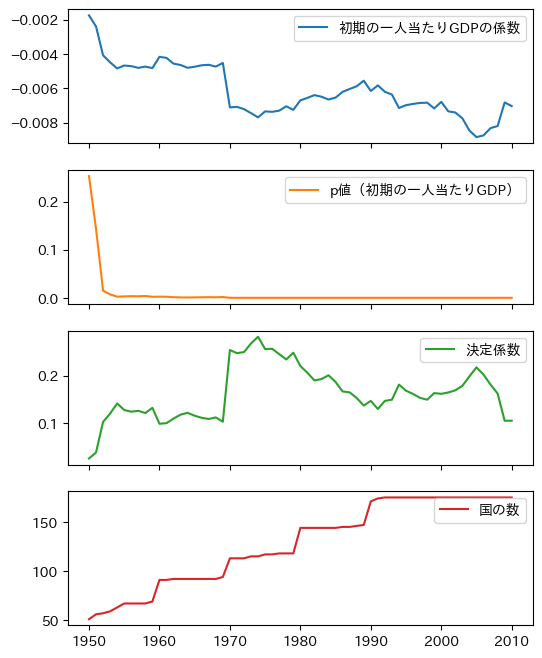

In [48]:
df_simple_result.plot(subplots=True, figsize=(6,8))
pass

一番上の図から初期の一人当たりGDPの係数の推定値は全て負の値となることがわかる。しかし二番目の図からわかるように，1950年年代半ばまでの推定値の統計的優位性低いが，それ以降は高いようだ。1955年以降だけを表示してみよう。

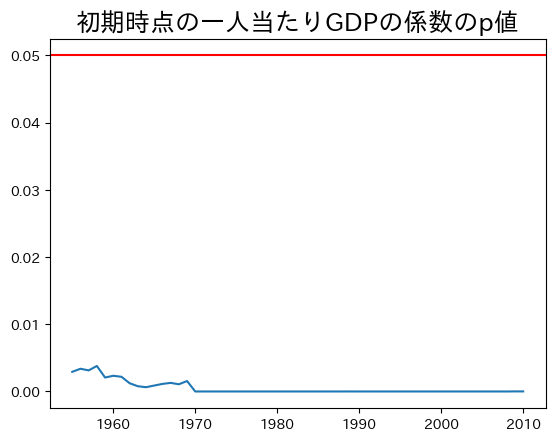

In [50]:
col_name = df_simple_result.columns[1]  # 1

ax_ = df_simple_result.loc[1955:,col_name].plot()
ax_.axhline(0.05, c='red')              # 2
ax_.set_title('初期時点の一人当たりGDPの係数のp値', size=18)
pass

```{admonition} コードの説明
:class: dropdown

1. $p$値が格納される列のラベルは`p値（初期の一人当たりGDP）`であり，これを直接書くには面倒であり，また全角を使うのを極力避けたい。その為に列ラベルを抽出している。`.columns`は列ラベルを返する属性であり，その一番目の要素が目的の列ラベルである。
2. `.axhline()`は横線を引くメソッド。
```

推定値は0となる帰無仮説を5%の優位水準で棄却できる。即ち，少なくとも1955年以降は絶対的所得収斂を示唆している。

### 重回帰分析：`for`ループで回帰分析

(sec:9-multiple_for_loop)=
### 重回帰分析：`for`ループで回帰分析

次のステップとして定常状態に関する３つの変数を追加して回帰分析をおこなう。ここでも`for`ループを使い，最終的にはプロットで結果を確認することにする。基本的には`for`ループを使った単回帰分析と同じ方法をとるが，ステップ１の関数`data_for_regression(yr)`は重回帰分析でもそのまま使えるので，ステップ２から始める。次のコードは上で使ったコードの修正版である。新たに追加した箇所だけに番号を振って説明することにする。

In [51]:
saving_coef_list = []                            # 1
emp_growth_coef_list = []                        # 2
depreciation_coef_list = []                      # 3
b_coef_list = []                                 # 4
b_pval_list = []                                 # 5
f_pval_list = []                                 # 6
rsquared_list = []                               # 7
nobs_list = []                                   # 8
yr_list = []                                     # 9

formula = ( 'gdp_pc_growth ~ saving_rate +'      # 10
                            'emp_growth +'
                            'depreciation +'
                            'gdp_pc_init_log' )

for yr in range(1950, 2000):                     # 11
    
    df0 = data_for_regression(yr)                # 12
    res = smf.ols(formula, data=df0).fit()       # 13
    c = res.params                               # 14
    p = res.pvalues                              # 15
    hypothesis = ( 'saving_rate=0,'              # 16
                   ' emp_growth=0,'
                   ' depreciation=0')
    f_pval = res.f_test(hypothesis).pvalue       # 17

    saving_coef_list.append( c.iloc[1] )         # 18
    emp_growth_coef_list.append( c.iloc[2] )     # 19
    depreciation_coef_list.append( c.iloc[3] )   # 20
    b_coef_list.append( c.iloc[4] )              # 21
    b_pval_list.append( p.iloc[4] )              # 22
    f_pval_list.append( f_pval )                 # 23
    rsquared_list.append( res.rsquared_adj )     # 24
    nobs_list.append( int(res.nobs) )            # 25
    yr_list.append(yr)                           # 26

                                                 # 27
df_multiple_result = pd.DataFrame({'貯蓄率の係数':saving_coef_list,
                                   '労働人口成長率の係数':emp_growth_coef_list,
                                   '資本減耗率の係数':depreciation_coef_list,
                                   '初期の一人当たりGDPの係数':b_coef_list,
                                   'p値（初期の一人当たりGDP）':b_pval_list,
                                   'p値（F検定）':f_pval_list,                                   
                                   '決定係数（調整済み）':rsquared_list,                                   
                                   '国の数':nobs_list},
                                   index=yr_list)

```{admonition} コードの説明
:class: dropdown

1. 貯蓄率$s$の係数を格納する空のリスト
2. 労働人口増加率$n$の係数を格納する空のリスト
3. 資本減耗率$d$の係数を格納する空のリスト
4. 初期の一人当たりGDPの係数を格納する空のリスト
5. 初期の一人当たりGDPの$p$値を格納する空のリスト
6. $F$検定の$p$値を格納する空のリスト
7. 調整済み決定係数を格納する空のリスト
8. 国の数（標本の大きさ）を格納する空のリスト
9. 年を格納する空のリスト
10. 回帰式が複数行に続いているので，右辺の両端に`()`を使っている。また文字列は一行ずつ`'`と`'`で囲むこと。もちろんシングル・クオート`'`の代わりにダブル・クオート`"`を使っても良い。
11. 初期を1950年から1999年までの`for`ループとする。
12. `DataFrame`の作成し`df0`に割り当てる
13. 推定結果を`res`に割り当てる
14. 係数の推定値を`c`に割り当てる
15. 係数の$p$値を`p`に割り当てる
16. $F$検定の制約式を定義する
17. $F$検定の$p$値を`f_pval`に割り当てる
18. `c`には推定値が`Series`として入っているので，`c[1]`で$s$の推定値を取得し`saving_coef_list`に割り当てる。
19. `c[2]`で$n$の推定値を取得し`emp_growth_coef_list`に割り当てる。
20. `c[3]`で$d$の推定値を取得し`depreciation_coef_list`に割り当てる。
21. `c[4]`で初期時点の一人当たりGDPの係数の推定値を取得し`b_coef_list`に割り当てる。
22. `p[4]`で初期時点の一人当たりGDPの係数の$p$値を取得し`b_pval_list`に割り当てる。
23. $F$検定の$p$値を`f_pval_list`に割り当てる
24. 決定係数（調整済み）を`rsquared_list`に割り当てる
25. 国の数（標本の大きさ）を整数型として`nobs_list`に割り当てる
26. 年を整数型として`yr_list`に割り当てる
27. `for`ループの結果を使い`DataFrame`を作成し`df_multiple_result`に割り当てる。
```

作成した`DataFrame`を確認してみる。

In [52]:
df_multiple_result.head(3)

,貯蓄率の係数,労働人口成長率の係数,資本減耗率の係数,初期の一人当たりGDPの係数,p値（初期の一人当たりGDP）,p値（F検定）,決定係数（調整済み）,国の数
1950,0.027785,-0.623810,0.306674,-0.004142,0.006315,0.000019,0.376210,51
1951,0.034675,-0.579155,0.322879,-0.004821,0.003904,0.000062,0.325401,56
1952,0.045980,-0.618314,0.355326,-0.006034,0.000167,0.000006,0.423553,57


定常状態に関連する変数の推定値や$F$検定の$p$値などが追加されているのが確認できる。1970年からの結果を表示してみよう。

In [54]:
df_multiple_result.loc[[1970],:]

,貯蓄率の係数,労働人口成長率の係数,資本減耗率の係数,初期の一人当たりGDPの係数,p値（初期の一人当たりGDP）,p値（F検定）,決定係数（調整済み）,国の数
1970,0.080015,-0.565459,0.439113,-0.007493,1.420001e-11,5.076499e-15,0.592888,113


係数の推定値は[上の](sec:9-regression_result)の結果と同じになることが確認できる。

ステップ３として`df_multiple_result`のメソッド`.plot()`を使い時系列データをプロットする。

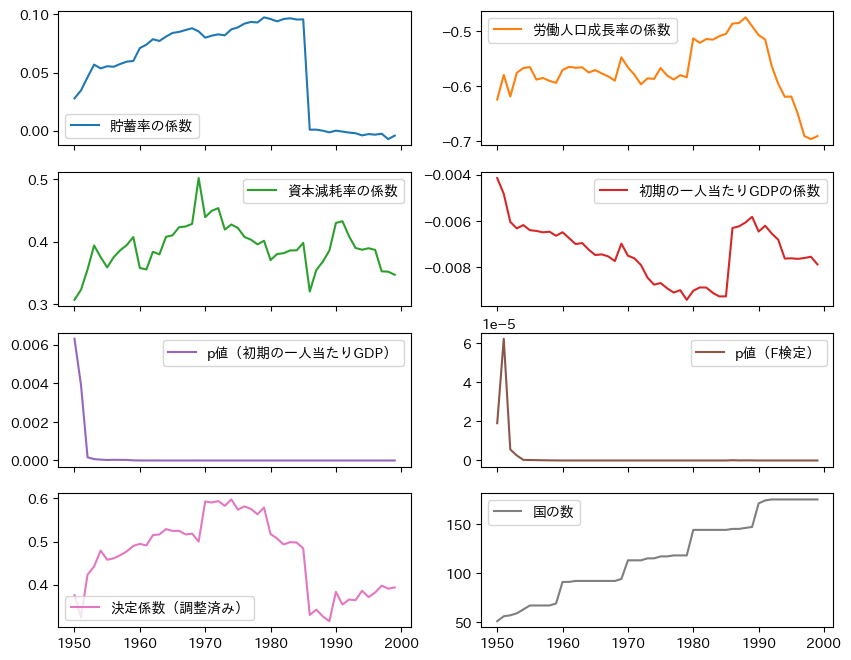

In [55]:
df_multiple_result.iloc[:,range(0,7+1)].plot(                # 1
                                             subplots=True,  # 2
                                             layout=(4,2),   # 3
                                             figsize=(10,8)) # 4
pass

````{admonition} コードの説明
:class: dropdown

1. `DataFrame`には10の列があるが，ここでは８つだけ表示するために`.iloc`を使っている。この場合，列をインデックスで指定する必要がある。`[0,1,2,3,4,5,6,7,8]`を作成するために`range(0,9)`で0~8の整数を準備し関数`list()`を使ってリストに変換している。次の内包表記でも同じ結果となる。
```
[i for i in range(0,9)]
```
2. `subplots=True`として複数の「軸」を表示している。
3. `layout=(4,2)`は４つの行と２の列の形で「軸」が表示されるようにレイアウトを指定している。
4. `figsize=(10,8)`はキャンバスの大きさを指定している。
````

係数の符号は資本減耗率以外は期待どおりである。$F$検定の$p$値に関しては，1960年以降一貫して非常に小さな値となっている。1950年代に高い値になっているのは，国の数が少なく比較的に所得水準が高い国が集まっていたためだと思われる。国の数が多くなる1960年以降，それぞれの期間で絶対的所得収斂が成立しているとは判断できない。

## まとめ

[「所得分布の推移」の節](sec:9-distribution)ではキャッチアップを示唆する結果が示された。一方，[「所得収斂」の節](sec:9-convergence)では絶対的所得収斂のエビデンスはなかった。相反する結果をどのように解釈すれば良いのだろうか。一つの可能性は「クラブ収斂」という概念である。世界全ての経済の定常状態が同じだと仮定するのは無理があると感じるの当たり前かも知れない。日本を含むOECD諸国とサブサハラ・アフリカ地域の国の違いを漠然と考えても，納得できるかも知れない。しかし，ある特性を共有する国では定常状態が概ね同じだとする仮定が成り立つかも知れない。典型的な例がOECD諸国である。ある「クラブ」（複数あり得る）に属している国の中で絶対的所得収斂が発生し，それが世界全体の所得分布の変化に現れているが，世界全体での絶対的所得収斂としては現れない，という可能性を否定できない。国の集合である「クラブ」は様々な特徴でグループ化できるので，多くの組み合わせがあり得る。`py4macro`に含まれるデータ`pwt`は次の変数を使い，データを様々な形でグループ化している。試してみてはどうだろうか。
* `oecd`：1990年代に始まった中央ヨーロッパへの拡大前のOECDメンバー国
* `income_group`：世界銀行が所得水準に従って分けた４つのグループ
    * `High income`
    * `Upper middle income`
    * `Lower middle income`
    * `Low income`
* `region`：世界銀行が国・地域に従って分けた７つのグループ
    * `East Asia & Pacific`
    * `Europe & Central Asia`
    * `Latin America & Caribbean`
    * `Middle East & North Africa`
    * `North America`
    * `South Asia`
    * `Sub-Saharan Africa`
* `continent`：南極以外の6大陸
    * `Africa`
    * `Asia`
    * `Australia`
    * `Europe`   
    * `North America`
    * `South America`
    
【注意】<br>
`region`の`South Asia`と`North America`，`continent`の`Australia`は標本の大きさが少ないため回帰分析をするとエラーになるので注意しよう。

## クラブ収斂

[「所得分布の推移」の節](sec:9-distribution)ではキャッチアップを示唆する結果が示された。一方，[「所得収斂」の節](sec:9-convergence)では絶対的所得収斂のエビデンスはなかった。相反する結果をどのように解釈すれば良いのだろうか。一つの可能性は「クラブ収斂」という概念である。世界全ての経済の定常状態が同じだと仮定するのは無理があると感じるの当たり前かも知れない。日本を含むOECD諸国とサブサハラ・アフリカ地域の国の違いを漠然と考えても，納得できるかも知れない。しかし，ある特性を共有する国では定常状態が概ね同じだとする仮定が成り立つかも知れない。典型的な例がOECD諸国である。ある「クラブ」に属している国の中で所得収斂が発生して，それが世界全体の所得分布の変化に現れている可能性も否定できない。ここではこの問題に焦点を当て，クラブ収斂があるかを確認する。国の集合である「クラブ」は様々な特徴でグループ化できるので，多くの組み合わせがあり得る。ここでは`py4macro`モジュールのPenn World Tableの変数を使い代表的なグループを考察するが，読者はここでは考えないグループ化を試してみてはどうだろうか。

まず関数`data_for_regression()`を修正して，あるグループからデータを抽出できる関数を定義する。新たな関数名は`data_for_regression_group`として次の５つの引数がある。
* `yr`：初期時点の年（以前と同じ）
* `oecd`：1990年代に始まった中央ヨーロッパへの拡大前にOECDメンバー国だけを抽出する場合は`1`（整数），その他の国を選択する場合は`0`（整数）を設定する。
* `income_group`：世界銀行は所得水準に従って国を次の４つに分けている。それぞれを選択する場合は文字列で指定する。
    * `High income`
    * `Upper middle income`
    * `Lower middle income`
    * `Low income`
* `region`：世界銀行が国・地域に従って分けた７つのグループ。それぞれを選択する場合は文字列で指定する。
    * `East Asia & Pacific`
    * `Europe & Central Asia`
    * `Latin America & Caribbean`
    * `Middle East & North Africa`
    * `North America`
    * `South Asia`
    * `Sub-Saharan Africa`
* `continent`：南極以外の6大陸。それぞれを選択する場合は文字列で指定する。
    * `Africa`
    * `Asia`
    * `Australia`
    * `Europe`   
    * `North America`
    * `South America`

＜注意＞
* グループを指定する引数４つは同時に指定することはできない。
* グループを指定する引数を指定しな場合は，`data_for_regression()`と同じようにデータがある国は全て含まれる。

＜例＞
1. 1980年のOECD以外の国全てのデータを抽出する場合：
    ```
    data_for_regression_group(1980, oecd=0)
    ```
1. 1960年の`region`が`Latin America & Caribbean`の場合：
    ```
    data_for_regression_group(1960, region='Latin America & Caribbean')
    ```

In [56]:
def data_for_regression_group(init_yr, oecd=None,          # 修正
                                       income_group=None,  # 修正
                                       region=None,        # 修正
                                       continent=None):    # 修正

    # === 初期の変数を抽出 ====================== 修正
    if (oecd==None) & (income_group==None) & (region==None) & (continent==None):
        df = pwt

    elif (oecd != None) & (income_group==None) & (region==None) & (continent==None):
        if oecd==1:
            df = pwt.query('oecd == 1')
        elif oecd==0:
            df = pwt.query('oecd == 0')
        else:
            print('引数を確認しましょう (^o^)/')
        
    elif (oecd==None) & (income_group != None) & (region==None) & (continent==None):
        if income_group not in ['High income',
                                'Upper middle income',
                                'Lower middle income',
                                'Low income']:
            print('引数を確認しましょう (^o^)/')
        else:
            df = pwt.query('income_group == @income_group')
        
    elif (oecd==None) & (income_group==None) & (region != None) & (continent==None):
        if region not in ['East Asia & Pacific',
                           'Europe & Central Asia',
                           'Latin America & Caribbean',
                           'Middle East & North Africa',
                           'North America',
                           'South Asia',
                           'Sub-Saharan Africa']:
            print('引数を確認しましょう (^o^)/')
        else:
            df = pwt.query('region == @region')
        
    elif (oecd==None) & (income_group==None) & (region==None) & (continent != None):
        if continent not in ['Africa',
                             'Asia',
                             'Australia',
                             'Europe',
                             'North America',
                             'South America']:
            print('引数を確認しましょう (^o^)/')
        else:
            df = pwt.query('continent == @continent')
    
    else:
        print('何かおかしいですよ。引数を確認しましょう (^o^)/')

        
    df0 = data_for_regression(init_yr, df)

    return df0

```{admonition} コードの説明
:class: dropdown

`data_for_regression`と異なる箇所は次の２点：
* `# 修正`ある５箇所
* `# === 初期の変数を抽出 ====================== 修正`とある箇所
    * 授業の範囲を超えそうなので説明は割愛する
```

実際に，1980年の`oecd=1`として関数を実行して内容を確認してみよう。

In [57]:
data_for_regression_group(1980, oecd=1)

,gdp_pc_init_log,saving_rate,depreciation,emp_growth,gdp_pc_growth
country,,,,,
Australia,11.024654,0.267635,0.029254,0.017840,0.011987
Austria,10.754585,0.295034,0.038706,0.006965,0.011552
Belgium,11.107632,0.295512,0.041218,0.006872,0.011338
Canada,11.122208,0.247076,0.035289,0.014313,0.008339
Denmark,10.860030,0.256372,0.038746,0.005630,0.013242
Finland,10.743959,0.296137,0.036868,0.003801,0.014908
France,11.073358,0.248080,0.032087,0.006989,0.010304
Germany,10.784802,0.243721,0.034565,0.004031,0.011778
Greece,10.674063,0.238684,0.027482,0.007141,0.002257


先進国だけが並んでいることが確認できる。

次に，`data_for_regression_group()`で整形されたデータに基づいて回帰分析をおこなうが，何回も計算しやすいように回帰分析結果を`DataFrame`として返す関数を定義する。関数を利用することにより，簡単に色々な「クラブ」のパターンを試すことが可能となる。関数の中身は[重回帰分析：`for`ループで回帰分析](sec:9-multiple_for_loop)で使った`for`ループのコードを３箇所だけ変更して再利用する。

In [58]:
def regression_result(init_yr=1960, **kwargs):       # 1

    saving_coef_list = []
    emp_growth_coef_list = []
    depreciation_coef_list = []
    b_coef_list = []
    b_pval_list = []
    f_pval_list = []
    rsquared_list = []
    nobs_list = []
    yr_list = []

    formula = ( 'gdp_pc_growth ~ saving_rate +'
                                'emp_growth +'
                                'depreciation +'
                                'gdp_pc_init_log' )

    for yr in range(init_yr, 2000):

        df0 = data_for_regression_group(yr, **kwargs)  # 2
        res = smf.ols(formula, data=df0).fit()
        c = res.params
        p = res.pvalues
        hypothesis = ( 'saving_rate=0,'
               ' emp_growth=0,'
               ' depreciation=0')
        f_pval = res.f_test(hypothesis).pvalue

        saving_coef_list.append( c[1] )
        emp_growth_coef_list.append( c[2] )
        depreciation_coef_list.append( c[3] )
        b_coef_list.append( c[4] )
        b_pval_list.append( p[4] )
        f_pval_list.append( f_pval )
        rsquared_list.append( res.rsquared_adj )
        nobs_list.append( int(res.nobs) )
        yr_list.append(yr)

                                                     # 3
    return pd.DataFrame({'貯蓄率の係数':saving_coef_list,
                         '労働人口成長率の係数':emp_growth_coef_list,
                         '資本減耗率の係数':depreciation_coef_list,
                         '初期の一人当たりGDPの係数':b_coef_list,
                         'p値（初期の一人当たりGDP）':b_pval_list,
                         'p値（F検定）':f_pval_list,                                   
                         '決定係数（調整済み）':rsquared_list,                                   
                         '国の数':nobs_list},
                         index=yr_list)

````{admonition} コードの説明
:class: dropdown

1. 引数について
    * `init_yr`：初期の年（デフォルトは`1960`）
    * `**kwargs`：「キーワード引数ならなんでも書いて良いよ」いう意味で，`init_yr`以外の全てのキーワード引数は`**kwargs`に格納される。ここでのキーワード引数は関数`data_for_regression_group()`を想定している。(2)を確認しよう。
2. (1)で設定されたキーワード引数は`**kwargs`に入っているので，それを`data_for_regression_group()`の引数として設定している。`data_for_regression_group()`が想定しないキーワード引数が`**kwargs`に入っていると`data_for_regression_group()`はエラーなどを出す事になる。次のように使う。
    ```
    regression_result(1950, continent='Europe')
    ```
   この場合，`**kwargs`に`continent='Europe'`が格納され，`data_for_regression_group()`に渡される事になる。
3. `DataFrame`を直接返すようになっている。
````

準備ができたので，実際に回帰分析をしてみよう。まず`oecd`諸国だけを抽出し結果をプロットする。

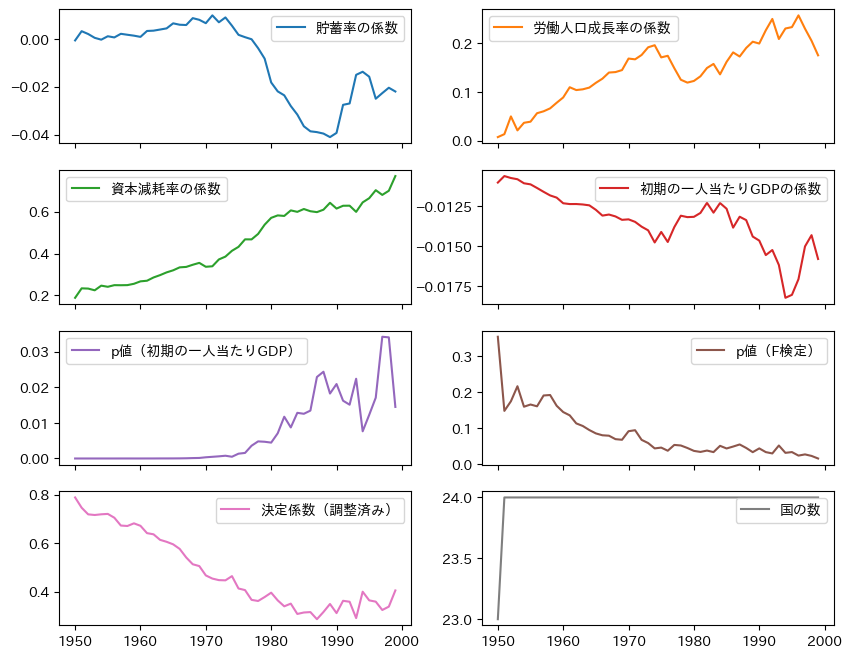

In [59]:
regression_result(init_yr=1950, oecd=1).plot(subplots=True,
                                             layout=(4,2),
                                             figsize=(10,8))
pass

貯蓄率と労働人口増加率の係数がマイナスになる場合もあり，表示していないが統計的有意性も低い。$F$検定の$p$値は1960年代中頃までは`0.1`以上の値となっている。即ち，長い時間的なスパンでは絶対的所得収斂の成立を示唆している。

次に`region`で`East Asia & Pacific`を考えてみよう。

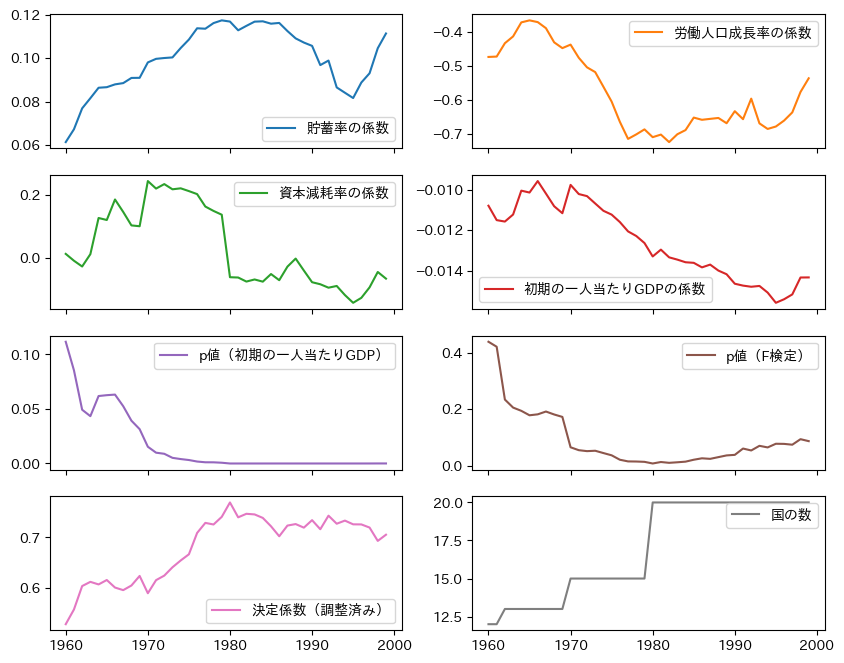

In [60]:
asia = regression_result(region='East Asia & Pacific')
asia.plot(subplots=True, layout=(4,2), figsize=(10,8))
pass

まず$F$検定の$p$値が`0.05を上回っている年を調べてみる。

In [75]:
cond_F = ( asia['p値（F検定）'] > 0.05 )    #1
asia.loc[cond_F,'p値（F検定）'].index       #2

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
      dtype='int64')

```{admonition} コートの説明
:class: dropdown

1. `$p$値（F検定）`の要素が0.05以上の場合は`True`，そうでない場合は`False`を返す。
2. (1)で`True`の行を抽出し，`.index`を使い行ラベルを取得している。
```

1960年代と1970年の前半，そして1990年代の間では，絶対的収斂の成立を示唆する結果となっている。

絶対的所得収斂のもう一つの条件は初期の一人当たりGDPが統計的に優位であることである。その$p$値が5％以下になるのは何年からか確認してみよう。

In [76]:
cond_p = ( asia.loc[:,'p値（初期の一人当たりGDP）'] <= 0.05 )
asia.loc[cond_p,:].index

Index([1962, 1963, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
      dtype='int64')

F検定のp値が`0.05`を上回っている時期と重複する期間がある。確認してみよう。

In [77]:
cond = ( cond_F & cond_p )
asia.loc[cond,:].index

Index([1962, 1963, 1968, 1969, 1970, 1971, 1972, 1973, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999],
      dtype='int64')

これらの期間で絶対的所得収斂のメカニズムが働いていることを意味している。またデータに含まれる国の数が増加している点も結果に影響していると考えられる。[「所得分布の推移」の節](sec:9-distribution)におけるキャッチアップを示唆する結果の裏では，ここで考察したクラブ収斂のメカニズムが動いていると考えるのが妥当だろう。他の「クラブ」のデータを使って確認してみよう。

【注意】<br>
`region`の`South Asia`と`North America`，`continent`の`Australia`は標本の大きさが少ないためエラーになるので注意しよう。